<a href="https://colab.research.google.com/github/ravadhani/NLP/blob/main/NewsArticleClassification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**

The casestudy is about how to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. I am using natural language processing and then create & compare at least three different models.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Importing the data file**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving flipitnews-data.csv to flipitnews-data.csv


In [4]:
df = pd.read_csv('flipitnews-data.csv')

In [5]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


**Exploring the data**

In [6]:
df.shape

(2225, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
print("News articles per category: \n")
print(df['Category'].value_counts())

News articles per category: 

Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64




*   The maximum number of articles are from Sports and Business category.





Categories in the dataset:  Index(['Sports', 'Business', 'Politics', 'Technology', 'Entertainment'], dtype='object', name='Category')


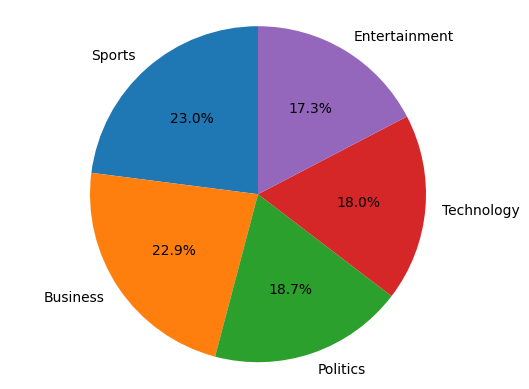

In [9]:
#check category distribution

def pie_chart(dataframe):
  label_counts = dataframe['Category'].value_counts()
  labels = label_counts.index
  sizes = label_counts.values
  print('Categories in the dataset: ', labels)
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  plt.axis('equal')
  plt.show()


pie_chart(df)

The data is almost equally distributed among all the labels.

#Processing the Text Data



*   Removing the non-letters
*   Remove Stopwords
*   Word tokenize the text
*   Perform Lemmatization





Let us check the sample text before text processing.

In [10]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [11]:
import re
import nltk
import re
#to tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#to remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
#for lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def process_text(text):
  stopwords_english = stopwords.words('english')

  #removing non-letters
  text = re.sub(r'[^a-zA-Z]', ' ', text)

  #word tokenization of the input text
  words = word_tokenize(text)

  #remove stopwords
  words = [w for w in words if w not in stopwords_english]

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(w) for w in words]

  processed_text = ' '.join(words)

  return processed_text

df['Article'] = df['Article'].apply(process_text)


The sample data after processing the text

In [13]:
df['Article'][1]

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

#Data Transformation

**Encoding the target variable** - We are using Ordinal Encoder from category_encoders.
It encodes categorical features as ordinal like 1,2,3.. integers to represent classes.

In [14]:
# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [15]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

In [16]:
df.head()

,Category,Article
0,1,tv future hand viewer home theatre system plas...
1,2,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raid box office ocean twelve crim...


**Labels after Encoding are** -

Category:

1 - Technology

2 - Business

3 - Sports

4 - Entertainment

5 - Politics

**Vectorizing the data**

In [17]:
#for BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
input_vec = int(input("Enter \n1 - If you want to use Bag of Words\n2 - If you want to use TF-IDF\nChoice: "))

if input_vec == 1:
  cv = CountVectorizer(max_features=5000)
  X = cv.fit_transform(df['Article']).toarray()
  y = np.array(df['Category'])

elif input_vec == 2:
  tf_idf = TfidfVectorizer()
  X = tf_idf.fit_transform(df['Article']).toarray()
  y = np.array(df['Category'])

else:
  print("Invalid Input")

Enter 
1 - If you want to use Bag of Words
2 - If you want to use TF-IDF
Choice: 2


**Train-Test split**

In [19]:
#to perform train test split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,
                                                  shuffle=True, stratify=y,
                                                  random_state = 42)

Number of rows in the train data and test data after the split.

In [21]:
print("No. of rows in train dataset: ", X_train.shape[0])
print("No. of rows in test dataset: ", X_val.shape[0])

No. of rows in train dataset:  1780
No. of rows in test dataset:  445


**1. Using Naive Bayes Classifier**

First we are going to use a simple approach for the multi-class classification using the Naive Bayes classification

In [22]:
#import the naive bayes model
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

Checking the **accuracy** of Naive Bayes model

In [23]:
#import performance metrics for evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score


In [24]:
#calculating train and test accuracy
nb_train_acc = accuracy_score(y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(y_val, nb.predict(X_val))

print("Train Accuracy : {:.3f}".format(nb_train_acc))
print("Test Accuracy : {:.3f}".format(nb_test_acc))


Train Accuracy : 0.989
Test Accuracy : 0.973


In [25]:
#making predictions on the test set and also getting the probabilities

y_pred_nb = nb.predict(X_val)
y_pred_prob_nb = nb.predict_proba(X_val)

In [26]:
#Computing the ROC AUC score

print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_val, y_pred_prob_nb, multi_class='ovr')))


ROC AUC Score: 0.999


In [27]:
#computing the precision, recall & f1 score
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Precision: 0.974
Recall: 0.973
F1 Score: 0.973


Plotting the **Confusion Matrix**

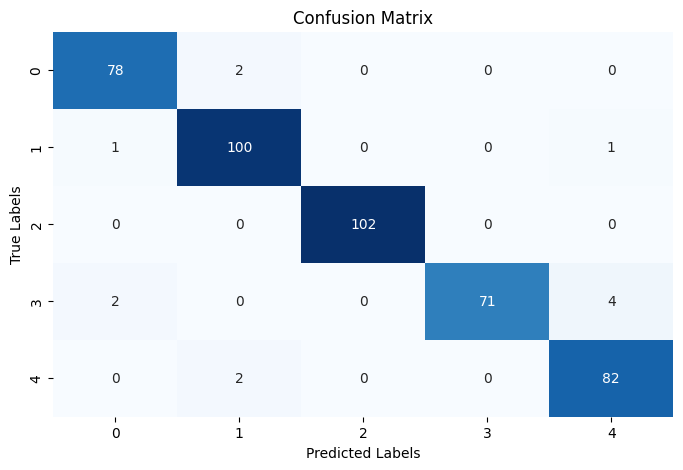

In [28]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Print the classification report

In [29]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97        80
           2       0.96      0.98      0.97       102
           3       1.00      1.00      1.00       102
           4       1.00      0.92      0.96        77
           5       0.94      0.98      0.96        84

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



In [36]:
# Initialize df_evaluations as an empty DataFrame - can compare all evaluations in the end to compare.
df_evaluations = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy',
                                       'ROC AUC Score', 'Precision', 'Recall', 'F1 Score'])

In [37]:
print(type(df_evaluations))

<class 'pandas.core.frame.DataFrame'>


In [38]:
data = pd.DataFrame({
    'Model': ['Naive Bayes'],
    'Train Accuracy': [nb_train_acc],
    'Test Accuracy': [nb_test_acc],
    'ROC AUC Score': [roc_auc_score(y_val, y_pred_prob_nb, multi_class='ovr')],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [39]:
data

,Model,Train Accuracy,Test Accuracy,ROC AUC Score,Precision,Recall,F1 Score
0,Naive Bayes,0.988764,0.973034,0.999097,0.973677,0.973034,0.972999


In [42]:
df_evaluations = pd.concat([df_evaluations, data], ignore_index=True)
df_evaluations

,Model,Train Accuracy,Test Accuracy,ROC AUC Score,Precision,Recall,F1 Score
0,Naive Bayes,0.988764,0.973034,0.999097,0.973677,0.973034,0.972999


#Functionalised Code

Creating a function for the above code so that we can pass any desired model to train & evaluate.

**Model Training**

In [43]:
def model_train(obj):
  obj.fit(X_train, y_train)     #training the model
  y_pred = obj.predict(X_val)   #making predictions
  y_pred_prob = obj.predict_proba(X_val)  #prediction probabilities
  return y_pred, y_pred_prob

**Model Evaluation**

In [55]:
def model_evaluate(obj, y_pred, y_pred_prob, df_evaluations):
  print("-------------------------")

  #calculating the train and test accuracy
  train_acc = accuracy_score(y_train, obj.predict(X_train))
  test_acc = accuracy_score(y_val, y_pred)
  print("Train Accuracy : {:.3f}".format(train_acc))
  print("Test Accuracy : {:.3f}\n".format(test_acc))

  #compute ROC AUC score
  print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_prob, multi_class='ovr')))

  #computing the precision, recall & f1 score
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')
  print("Precision: {:.3f}".format(precision))
  print("Recall: {:.3f}".format(recall))
  print("F1 Score: {:.3f}".format(f1))

  print("-------------------------")

  #adding the evaluations and returning them - just for documenting and comparing purpose
  data = pd.DataFrame({
    'Model': [obj],
    'Train Accuracy': [train_acc],
    'Test Accuracy': [test_acc],
    'ROC AUC Score': [roc_auc_score(y_val, y_pred_prob, multi_class='ovr')],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]})
  return data

The above two methods can be used for each of the different classifiers by just passing the classifier object to the functions.

Classifiers used:


*   Decision Tree
*   KNN Classifier
*   List item
*   List item





**Decision Tree Classifier**

In [45]:
#import decision tree ML model
from sklearn.tree import DecisionTreeClassifier

In [65]:
#creating the model object
dt = DecisionTreeClassifier()

#training the model using the model_train function
y_pred_dt, y_pred_prob_dt = model_train(dt)

#evaluating the model using the model_evaluate function
data = model_evaluate(dt, y_pred_dt, y_pred_prob_dt, df_evaluations)

df_evaluations = pd.concat([df_evaluations, data], ignore_index=True)


-------------------------
Train Accuracy : 1.000
Test Accuracy : 0.849

ROC AUC Score: 0.904

Precision: 0.853
Recall: 0.849
F1 Score: 0.850
-------------------------


**KNN Classifier**

In [59]:
#import knn model
from sklearn.neighbors import KNeighborsClassifier

In [61]:
#creating the model object
knn = KNeighborsClassifier(n_neighbors=5)

#training the model using the model_train function
y_pred_knn, y_pred_prob_knn = model_train(knn)

#evaluating the model using the model_evaluate function
data = model_evaluate(knn, y_pred_knn, y_pred_prob_knn, df_evaluations)

df_evaluations = pd.concat([df_evaluations, data], ignore_index=True)

-------------------------
Train Accuracy : 0.965
Test Accuracy : 0.937

ROC AUC Score: 0.987

Precision: 0.939
Recall: 0.937
F1 Score: 0.937
-------------------------


**Random Forest Classifier**

In [62]:
#import random forest ml model
from sklearn.ensemble import RandomForestClassifier

In [63]:
#creating the model object
rf = RandomForestClassifier()

#training the model using the model_train function
y_pred_rf, y_pred_prob_rf = model_train(rf)

#evaluating the model using the model_evaluate function
data = model_evaluate(rf, y_pred_rf, y_pred_prob_rf, df_evaluations)

df_evaluations = pd.concat([df_evaluations, data], ignore_index=True)

-------------------------
Train Accuracy : 1.000
Test Accuracy : 0.969

ROC AUC Score: 0.998

Precision: 0.969
Recall: 0.969
F1 Score: 0.969
-------------------------


We can comoare all the values from the different models we executed so far.

In [64]:
#can check and compare all values in a glance and decide which model is better
df_evaluations

,Model,Train Accuracy,Test Accuracy,ROC AUC Score,Precision,Recall,F1 Score
0,Naive Bayes,0.988764,0.973034,0.999097,0.973677,0.973034,0.972999
1,DecisionTreeClassifier(),1.000000,0.844944,0.902144,0.844845,0.844944,0.844462
2,KNeighborsClassifier(),0.964607,0.937079,0.987241,0.939353,0.937079,0.936931
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.968539,0.998204,0.969222,0.968539,0.968537




*   From the above data we can say that Naive Bayes has been the best model with high accuracy and less overfitting to train data.




#Questionnaire:

**How many news articles are present in the dataset that we have?**

2225

**Most of the news articles are from _____ category.**

Sports & Business

**Only ___ no. of articles belong to the ‘Technology’ category.**

401

**What are Stop Words and why should they be removed from the text data?**


*   Stop words are common words used in the language that do no carry significant meaning on their own.
*   Examples of stop words are, 'the', 'is', 'at', 'what', 'then' etc.
*   Stop words are typically removed from text data as they do not contribute to the meaning and they act as noise in the data.
*   They also consume computational resources, so for efficient processing they are removed. It improves the model performance by letting the model focus more on important patterns and features of the text.


**Explain the difference between Stemming and Lemmatization.**


*   Stemming and Lemmatization are both techniques used in NLP to reduce words to their base forms.
*   Lemmatization produces more meaningful dictonary form of the words whereas Stemming just extracts the root word and itdoesnt have to be valid.
*   On the other hand Stemming is simpler and faster and is useful for certain applications where speed is more important than precision.

